In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

### 1. Resize the training images to 128x128

In [2]:
#1. Resize the training images to 128 x 128

#Resize Ford images
img_Ford1 = cv2.cvtColor(cv2.imread("./dataset/ford_train1.jpeg"), cv2.COLOR_BGR2GRAY)
img_Ford1 = cv2.resize(img_Ford1, (128, 128))
img_Ford2 = cv2.cvtColor(cv2.imread("./dataset/ford_train2.jpeg"), cv2.COLOR_BGR2GRAY)
img_Ford2 = cv2.resize(img_Ford2, (128, 128))
img_Ford3 = cv2.cvtColor(cv2.imread("./dataset/ford_train3.jpeg"), cv2.COLOR_BGR2GRAY)
img_Ford3 = cv2.resize(img_Ford3, (128, 128))
img_Ford4 = cv2.cvtColor(cv2.imread("./dataset/ford_train4.png"), cv2.COLOR_BGR2GRAY)
img_Ford4 = cv2.resize(img_Ford4, (128, 128))
img_Ford5 = cv2.cvtColor(cv2.imread("./dataset/ford_train5.jpeg"), cv2.COLOR_BGR2GRAY)
img_Ford5 = cv2.resize(img_Ford5, (128, 128))

#Resize Volkswagen images
img_Volks1 = cv2.cvtColor(cv2.imread("./dataset/volks_train1.png"), cv2.COLOR_BGR2GRAY)
img_Volks1 = cv2.resize(img_Volks1, (128, 128))
img_Volks2 = cv2.cvtColor(cv2.imread("./dataset/volks_train2.jpeg"), cv2.COLOR_BGR2GRAY)
img_Volks2 = cv2.resize(img_Volks2, (128, 128))
img_Volks3 = cv2.cvtColor(cv2.imread("./dataset/volks_train3.jpeg"), cv2.COLOR_BGR2GRAY)
img_Volks3 = cv2.resize(img_Volks3, (128, 128))
img_Volks4 = cv2.cvtColor(cv2.imread("./dataset/volks_train4.jpeg"), cv2.COLOR_BGR2GRAY)
img_Volks4 = cv2.resize(img_Volks4, (128, 128))
img_Volks5 = cv2.cvtColor(cv2.imread("./dataset/volks_train5.jpeg"), cv2.COLOR_BGR2GRAY)
img_Volks5 = cv2.resize(img_Volks5, (128, 128))

#### 2. Compute HoG features of size (32,32,8). Apply blocknorm in 4 x 4 cell neighborhood. (Deduce values of other required variables.) (11points)
#### 3. Fit a nearest neighbor classifer with three neighbors. (2 points)

In [3]:
image_training = [img_Ford1, img_Ford2, img_Ford3, img_Ford4, img_Ford5, img_Volks1, img_Volks2, img_Volks3, img_Volks4, img_Volks5]

class_label = [1, 1, 1, 1, 1, -1, -1, -1, -1, -1]

# HOG feature computation
cell_size = (4, 4)  # h x w in pixels
block_size = (4, 4)  # h x w in cells
nbins = 8  # number of orientation bins

# create an empty array to store the hog-features of the training images
HoG_Features = []

# create HoG Object
# winSize is the size of the image cropped to an multiple of the cell size
# can have overlapping or non-overlapping cell/blocks
# shape 1 single vector into matrix to give you desired size
for i in range (len(image_training)):
    hog = cv2.HOGDescriptor(_winSize=(image_training[i].shape[1] // cell_size[1] * cell_size[1],
                                      image_training[i].shape[0] // cell_size[0] * cell_size[0]),
                        _blockSize=(block_size[1] * cell_size[1],
                                    block_size[0] * cell_size[0]),
                        _blockStride=(cell_size[1], cell_size[0]),
                        _cellSize=(cell_size[1], cell_size[0]),
                        _nbins=nbins)
    
    n_cells = (image_training[i].shape[0] // cell_size[0], image_training[i].shape[1] // cell_size[1])
    
    hog_feats = hog.compute(image_training[i])\
               .reshape(n_cells[1] - block_size[1] + 1,
                        n_cells[0] - block_size[0] + 1,
                        block_size[0], block_size[1], nbins) \
               .transpose((1, 0, 2, 3, 4))  # index blocks by rows first 
    
    gradients = np.full((n_cells[0], n_cells[1], 8), 0, dtype=float)
    cell_count = np.full((n_cells[0], n_cells[1], 1), 0, dtype=int)
    
    for off_y in range(block_size[0]):
        for off_x in range(block_size[1]):
            gradients[off_y:n_cells[0] - block_size[0] + off_y + 1,
                  off_x:n_cells[1] - block_size[1] + off_x + 1] += \
            hog_feats[:, :, off_y, off_x, :]
            cell_count[off_y:n_cells[0] - block_size[0] + off_y + 1,
                   off_x:n_cells[1] - block_size[1] + off_x + 1] += 1
            
    gradients /= cell_count # Average gradients
    HoG_Features.append(gradients) 

    
## We now get a list of hog features of each shape of (32, 32, 8)
for i in range (len(HoG_Features)):
    HoG_Features[i] = np.reshape(HoG_Features[i], HoG_Features[i].size)
    
# classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(HoG_Features, class_label)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

### Testing
#### 1. Resize test images to 128 x 128. (0.5 points)
#### 2. Compute HoG features similar to what was done during training. (2 points)

In [4]:
#1. Resize test images to 128 x 128
img_test_ford = cv2.cvtColor(cv2.imread("./dataset/ford_test.jpeg"), cv2.COLOR_BGR2GRAY)
img_test_ford = cv2.resize(img_test_ford, (128, 128))
img_test_volks = cv2.cvtColor(cv2.imread("./dataset/volks_test.jpeg"), cv2.COLOR_BGR2GRAY)
img_test_volks = cv2.resize(img_test_volks, (128, 128))

#2. Compute HoG features 
# HoG Features for Test_Ford
hog_test_ford = cv2.HOGDescriptor(_winSize=(img_test_ford.shape[1] // cell_size[1] * cell_size[1],
                                  img_test_ford.shape[0] // cell_size[0] * cell_size[0]),
                        _blockSize=(block_size[1] * cell_size[1],
                                    block_size[0] * cell_size[0]),
                        _blockStride=(cell_size[1], cell_size[0]),
                        _cellSize=(cell_size[1], cell_size[0]),
                        _nbins=nbins)

n_cells_test_ford = (img_test_ford.shape[0] // cell_size[0], img_test_ford.shape[1] // cell_size[1])

# Compute HoG features
hog_feats_test_ford = hog.compute(img_test_ford)\
               .reshape(n_cells_test_ford[1] - block_size[1] + 1,
                        n_cells_test_ford[0] - block_size[0] + 1,
                        block_size[0], block_size[1], nbins) \
               .transpose((1, 0, 2, 3, 4))  # index blocks by rows first

# hog_feats now contains the gradient amplitudes for each direction,for each cell of its group for each group.
# Indexing is by rows then columns.

# computation for BlockNorm
gradients_test_ford = np.full((n_cells[0], n_cells[1], 8), 0, dtype=float)
cell_count_test_ford = np.full((n_cells[0], n_cells[1], 1), 0, dtype=int)

for off_y in range(block_size[0]):
    for off_x in range(block_size[1]):
        gradients_test_ford[off_y:n_cells_test_ford[0] - block_size[0] + off_y + 1,
                  off_x:n_cells_test_ford[1] - block_size[1] + off_x + 1] += \
            hog_feats_test_ford[:, :, off_y, off_x, :]
        cell_count_test_ford[off_y:n_cells_test_ford[0] - block_size[0] + off_y + 1,
                   off_x:n_cells_test_ford[1] - block_size[1] + off_x + 1] += 1

# Average gradients
gradients_test_ford /= cell_count_test_ford




# HoG Features for Test Volks
hog_test_volks = cv2.HOGDescriptor(_winSize=(img_test_volks.shape[1] // cell_size[1] * cell_size[1],
                                  img_test_volks.shape[0] // cell_size[0] * cell_size[0]),
                        _blockSize=(block_size[1] * cell_size[1],
                                    block_size[0] * cell_size[0]),
                        _blockStride=(cell_size[1], cell_size[0]),
                        _cellSize=(cell_size[1], cell_size[0]),
                        _nbins=nbins)

n_cells_test_volks = (img_test_volks.shape[0] // cell_size[0], img_test_volks.shape[1] // cell_size[1])

# Compute HoG features
hog_feats_test_volks = hog.compute(img_test_volks)\
               .reshape(n_cells_test_volks[1] - block_size[1] + 1,
                        n_cells_test_volks[0] - block_size[0] + 1,
                        block_size[0], block_size[1], nbins) \
               .transpose((1, 0, 2, 3, 4))  # index blocks by rows first

# hog_feats now contains the gradient amplitudes for each direction,for each cell of its group for each group.
# Indexing is by rows then columns.

# computation for BlockNorm
gradients_test_volks = np.full((n_cells[0], n_cells[1], 8), 0, dtype=float)
cell_count_test_volks = np.full((n_cells[0], n_cells[1], 1), 0, dtype=int)

for off_y in range(block_size[0]):
    for off_x in range(block_size[1]):
        gradients_test_volks[off_y:n_cells_test_volks[0] - block_size[0] + off_y + 1,
                  off_x:n_cells_test_volks[1] - block_size[1] + off_x + 1] += \
            hog_feats_test_volks[:, :, off_y, off_x, :]
        cell_count_test_volks[off_y:n_cells_test_volks[0] - block_size[0] + off_y + 1,
                   off_x:n_cells_test_volks[1] - block_size[1] + off_x + 1] += 1

# Average gradients
gradients_test_volks /= cell_count_test_volks




#### 3. Display the features for both test images. (3 points)
#### 4. Classify the test images using the classifier built above. (1 points)

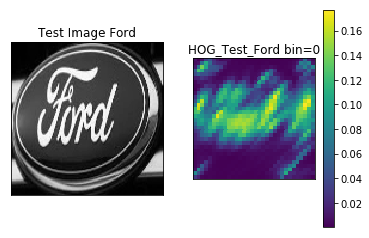

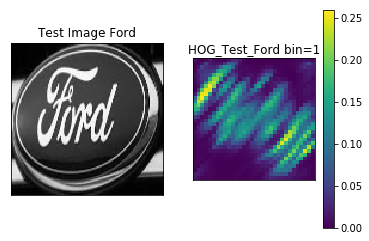

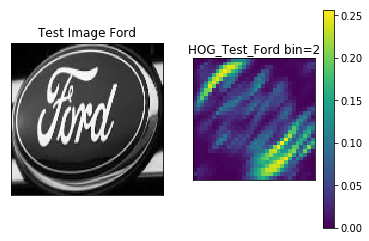

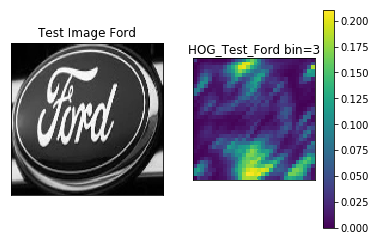

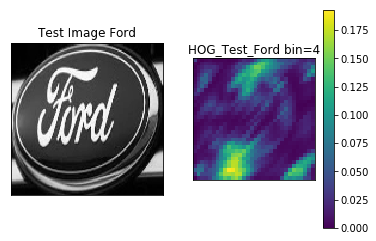

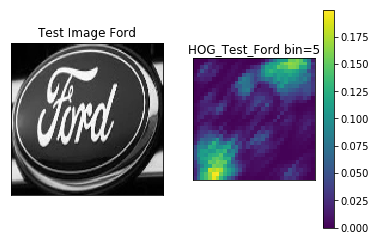

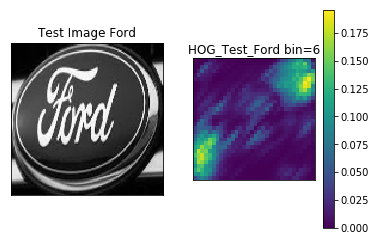

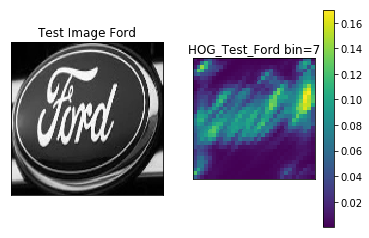

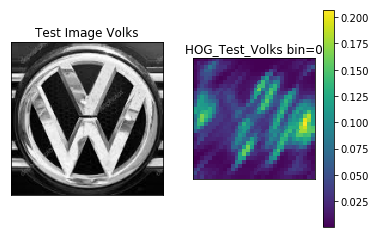

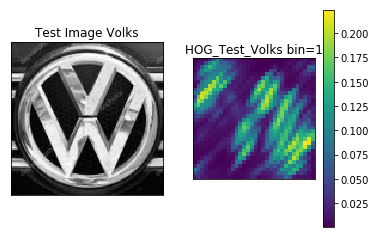

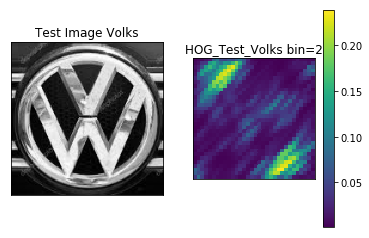

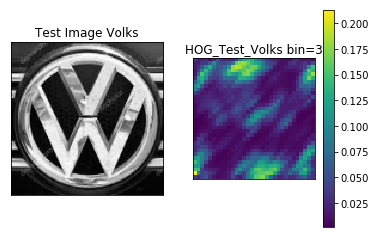

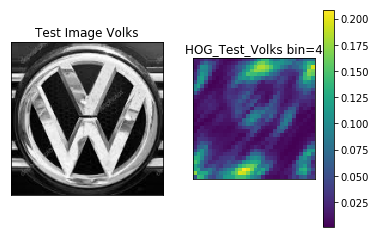

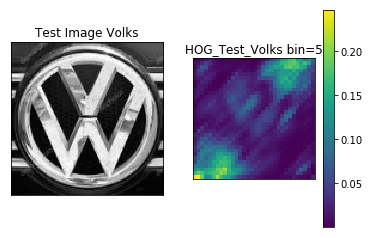

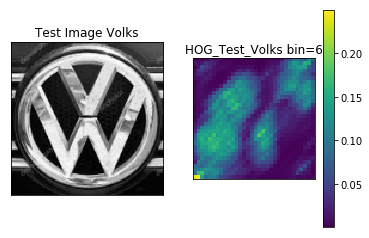

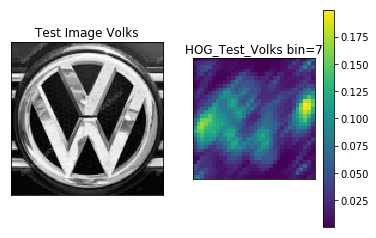

[ 1 -1]


In [5]:
#3. Display the features for both test images
for i in range (0, 8, 1):
    plt.subplot(121)
    plt.imshow(img_test_ford, cmap='gray')
    plt.title("Test Image Ford"), plt.xticks([]), plt.yticks([])
    
    s = str(i)
    bin = i  # angle is 360 / nbins * direction
    plt.subplot(122)
    plt.pcolor(gradients_test_ford[:, :, bin])
    plt.gca().invert_yaxis()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title("HOG_Test_Ford bin=" + s), plt.xticks([]), plt.yticks([])
    plt.colorbar()
    plt.show()
    
for i in range (0, 8, 1):
    plt.subplot(121)
    plt.imshow(img_test_volks, cmap='gray')
    plt.title("Test Image Volks"), plt.xticks([]), plt.yticks([])
    
    s = str(i)
    bin = i  # angle is 360 / nbins * direction
    plt.subplot(122)
    plt.pcolor(gradients_test_volks[:, :, bin])
    plt.gca().invert_yaxis()
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title("HOG_Test_Volks bin=" + s), plt.xticks([]), plt.yticks([])
    plt.colorbar()
    plt.show()
    
#4. Classification
gradients_test_ford = np.reshape(gradients_test_ford, gradients_test_ford.size)
gradients_test_volks = np.reshape(gradients_test_volks, gradients_test_volks.size)
test = [gradients_test_ford, gradients_test_volks]
pred = knn.predict(test)
print (pred) # SHould be [-1 1]

### 3.2 Reasoning Questions

#### 1. Will HoG work if images of logos undergo random rotation? If yes, which property of HoG avails this feature? If not, discuss the sequence of computer vision technique(s) that can be used in order to regain uniform orientation of the logos. (3 points)
The HoG technique would not work if the images undergo random rotation. This is because that the HoG technique operates based on the orientation of the gradients computed from the images. If the images undergo random rotation, the gradients would not be the same. 


#### 2. Consider that you are given a large dataset with three types of images: variable sized squares with either or both diagonals drawn (see Figure 3). How many and which directions of the gradient are sufficient in order to correctly classify the images into three categories? (2 points)
We need 2 directions of the gradient, which are 45 degrees and 135 degrees respectively. 